In [53]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow 
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt



In [54]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [55]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [56]:
train_images.shape


(60000, 28, 28)

In [57]:
len(train_labels)


60000

In [58]:
train_labels


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [59]:
test_images.shape


(10000, 28, 28)

In [60]:
len(test_labels)


10000

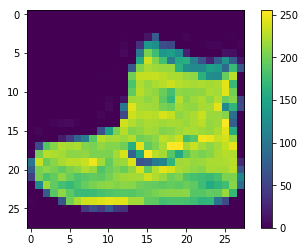

In [61]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [62]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [63]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [64]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [65]:
model.fit(train_images, train_labels, epochs=10)


Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.4978 - accuracy: 0.8249
Epoch 2/10
60000/60000 [==============================] - 5s 87us/sample - loss: 0.3736 - accuracy: 0.8668
Epoch 3/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.3341 - accuracy: 0.8781
Epoch 4/10
60000/60000 [==============================] - 5s 92us/sample - loss: 0.3093 - accuracy: 0.8876
Epoch 5/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.2930 - accuracy: 0.8913
Epoch 6/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.2768 - accuracy: 0.8971s - loss: 0.2774 
Epoch 7/10
60000/60000 [==============================] - 5s 90us/sample - loss: 0.2675 - accuracy: 0.9015
Epoch 8/10
60000/60000 [==============================] - 6s 92us/sample - loss: 0.2539 - accuracy: 0.9054
Epoch 9/10
60000/60000 [==============================] - 5s 90us/sample - loss: 0.2457 - accuracy: 0.90

In [67]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 0s - loss: 0.3317 - accuracy: 0.8843

Test accuracy: 0.8843


In [69]:
test_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [70]:
predictions = model.predict(test_images)


In [71]:
predictions[0]


array([4.4246354e-07, 2.2349189e-08, 4.8092375e-10, 2.2328897e-09,
       4.9823406e-08, 3.9147987e-04, 3.9697409e-07, 5.4228403e-02,
       2.7360038e-08, 9.4537914e-01], dtype=float32)

In [72]:
np.argmax(predictions[0])


9

In [29]:
test_labels[0]


9

In [30]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [31]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [32]:
predictions_single = model.predict(img)

print(predictions_single)

[[2.7962044e-04 6.2547764e-13 9.7112894e-01 3.5686955e-12 1.4637732e-02
  4.8067683e-12 1.3953729e-02 7.6715181e-15 1.7676647e-11 2.1312618e-16]]


In [34]:
np.argmax(predictions_single[0])


2

In [35]:
model.save('FashionMNIST.h5')